# Challenge 1: Print Numbers in a list

In [ ]:
# Data to convert to celsius

boulder_avg_high_temp_f = [
    47,
    49,
    57,
    64,
    72,
    83,
    89,
    87,
    79,
    67,
    55,
    47
]

for temp in boulder_avg_high_temp_f:
    print("temp:", temp)

temp: 47
temp: 49
temp: 57
temp: 64
temp: 72
temp: 83
temp: 89
temp: 87
temp: 79
temp: 67
temp: 55
temp: 47


#  Challenge 2: Modify Numeric Values in a List

In [6]:
def f_to_c(fahrenheit):
    celcius = (fahrenheit - 32) * 5/9
    return(round(celcius, 2))

boulder_avg_high_temp_c = [f_to_c(temp) for temp in boulder_avg_high_temp_f]

boulder_avg_high_temp_c

[8.33,
 9.44,
 13.89,
 17.78,
 22.22,
 28.33,
 31.67,
 30.56,
 26.11,
 19.44,
 12.78,
 8.33]

# Challenge 4: Print A List of Directories

In [7]:
import os 
from glob import glob
import earthpy as et 

# Download data on average monthly temp for two California sites
file_url = "https://ndownloader.figshare.com/files/21894528"
out_path = et.data.get_data(url = file_url)


# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 
                      "earth-analytics", 
                      "data",
                      "earthpy-downloads"))

# Creating all_dirs list of directories to loop through

data_dirs = os.path.join(out_path, "*")
all_dirs = glob(data_dirs)

In [8]:
for dir in all_dirs:
    print(dir)

/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego
/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma


# Challenge 5: Print A List of All Files Within Each Directory
Above, you printed the name of each directory stored in a list of directories. Use the same for loop that you created above to print a list of all files in each directory.

HINT: you will want to use the glob function to create a list of files within each directory.

In [14]:
file_list = []

for dir in all_dirs:
    files_in_dir = glob(os.path.join(dir, "*"))
    for file in files_in_dir:
        file_list.append(file)

file_list

['/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv',
 '/Users/judith/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv',
 '/User

# Bonus Challenge 1: Get Data from List of Files
Above, you created a list inside of a for loop to view all of the files stored in two separate folders. These files are csv files that can be opened with pandas as a DataFrame. The files contain the average monthly temperature for two different study locations, Sonoma and San Diego. Their are csv files for each location for the years between 1999 and 2003.

For this challenge, use nested for loops to get data from the files and find the average temperature in January over the years for the two sites. The end result should be two variables that represent the average January temperature for each site. Their are many ways to get this data, so don’t be afraid to get creative!

In [23]:
import pandas as pd
import os as os

data_frame = []

for dir in all_dirs:
    files_in_dir = glob(os.path.join(dir, "*"))
    for file in files_in_dir:
        temp = pd.read_csv(file)
        temp["location"] = os.path.basename(dir)
        data_frame.append(temp)


data_frame = pd.concat(data_frame)
data_frame.sort()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma


In [47]:
month_names_url = 'https://ndownloader.figshare.com/files/12565619'

# Download data
months_path = et.data.get_data(url=month_names_url)

In [70]:
import numpy as np

# Check for files and then load data files for plot
if os.path.exists(months_path):
    months = np.loadtxt(months_path,'str')
    print(months)
else:
    print("Data file not found!")


['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']


array([[63. , 66.2, 63.6, 63.7, 66.1, 68.7, 71.8, 73.4, 75.5, 68.4, 71.4,
        63.7],
       [71.4, 64.6, 66.5, 65.2, 66.9, 67.4, 74.3, 77.5, 74. , 73.1, 67.4,
        64.6],
       [65.2, 64.9, 63.6, 64.6, 64.4, 66.9, 72.7, 72.7, 71.4, 77.7, 67.4,
        67.6],
       [62.2, 61.7, 63.7, 63.6, 67.5, 72. , 73. , 73.5, 73.2, 71.1, 66.9,
        63.3],
       [65.8, 65.3, 63.7, 67.7, 69.1, 72.4, 73.5, 76.3, 75.5, 69.5, 66. ,
        66.9],
       [56.8, 58. , 64.8, 69.5, 75. , 79.5, 81.4, 83.7, 83.4, 71.8, 60.7,
        58.5],
       [56.5, 58.4, 68. , 66.7, 83.1, 86.1, 81.2, 85.3, 81. , 78.4, 64. ,
        55.6],
       [56.1, 56.6, 58.7, 68.3, 72.7, 80.6, 80.9, 82.9, 81.3, 79.1, 64.2,
        61.5],
       [58.9, 61.8, 66.4, 61.5, 74.2, 81.1, 87. , 83.5, 85. , 82.7, 61. ,
        56.4],
       [55.8, 62.9, 63.5, 66.9, 74.5, 84.2, 82.8, 82.1, 84.5, 75.7, 67.6,
        57.4]])

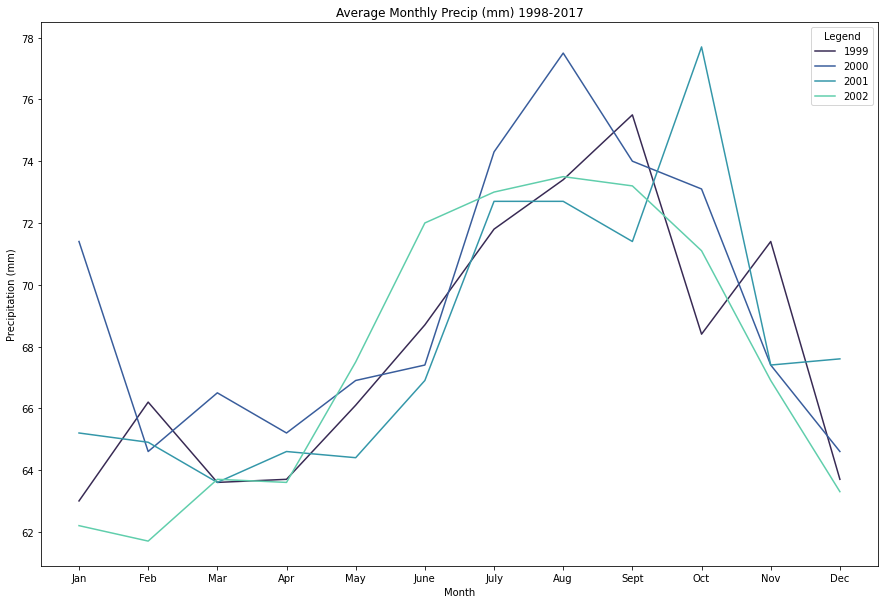

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

boulder_annual_precip_mm = data_frame.loc[:, 'January':'December']
boulder_annual_precip_mm = boulder_annual_precip_mm.to_numpy()

# Define plot space
fig, ax = plt.subplots(figsize=(15, 10))

# Set up plot variables
plot_years = [*range(1999, 2003, 1)] 
plot_colors = sns.color_palette("mako", n_colors=len(plot_years))


for ayear, acolor, annual_precip in zip(plot_years, plot_colors, boulder_annual_precip_mm):
    ax.plot(months,
            annual_precip,
            label="plot_years",
            color=acolor)

# Set plot title and axes labels
ax.set(title="Average Monthly Precip (mm) 1998-2017",
       xlabel="Month",
       ylabel="Precipitation (mm)")

# Set Legend
plt.legend(plot_years, title="Legend", loc='best')

plt.show()

In [33]:
sandiego = data_frame[data_frame['location'] == "San-Diego"]
sandiego["January"].mean().round(2)

65.52

In [34]:
sonoma = data_frame[data_frame['location'] == "Sonoma"]
sonoma["January"].mean().round(2)

56.82

#  Bonus Challenge 2: Collatz Conjecture

In [38]:
x = 10000

while x != 1:
    if (x%2) == 0:
        x *= .5
        print(x)
    else:
        x = (x * 3) + 1
        print(x)

    

5000.0
2500.0
1250.0
625.0
1876.0
938.0
469.0
1408.0
704.0
352.0
176.0
88.0
44.0
22.0
11.0
34.0
17.0
52.0
26.0
13.0
40.0
20.0
10.0
5.0
16.0
8.0
4.0
2.0
1.0
